In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

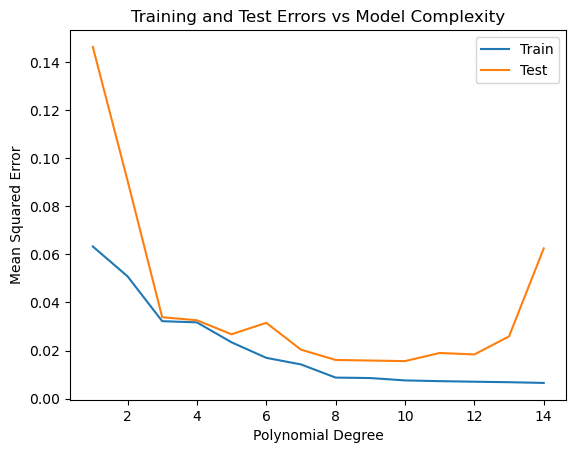

In [11]:
MSE_test, MSE_train = np.zeros((50, 14)), np.zeros((50, 14))

np.random.seed(3)

for i in range(50):
    n = 50
    # Make data set.
    x = np.linspace(-3, 3, n).reshape(-1, 1)
    y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)
    
    # Splitting the data into train and test
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=3)

    mse_train = np.zeros(14)
    mse_test = np.zeros(14)
    degrees = list(range(1,15))
    for deg in degrees:
        # Fitting the data
        model = Pipeline([
            ('polynomial_features', PolynomialFeatures(degree=deg)),
            ('linear_regressor', LinearRegression())
            ])

        model.fit(X_train, Y_train)

        y_predict_train = model.predict(X_train)
        y_predict_test = model.predict(X_test)

        # calculating the MSE for the train and test dataset
        mse_train[deg-1] = mean_squared_error(Y_train, y_predict_train)
        mse_test[deg-1] = mean_squared_error(Y_test, y_predict_test)

    MSE_train[i] = mse_train
    MSE_test[i] = mse_test

    MSE_train_mean = np.mean(MSE_train, axis=0)
    MSE_test_mean = np.mean(MSE_test, axis=0)

plt.plot(degrees, MSE_train_mean, label='Train')
plt.plot(degrees, MSE_test_mean, label='Test')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Training and Test Errors vs Model Complexity')
plt.legend()
plt.show()
